In [1]:
# df = dd.read_parquet('data/2000-01.parquet', columns=['name', 'x'], engine='pyarrow')

---

## Atmospheric Pressure Analysis

---

<br>

**READ**  -  I've created a python script to allow the user to click the button and then they can either have all of the underyling code shown, OR they can just look at the code raw output (charts, plots, tables, whatever).  
As you know, sometimes these notebooks contain a fair amount of code... and sometimes folks just want the _results_... here is an [example](https://nbviewer.jupyter.org/urls/gist.github.com/masnick/d6a1af14812c0c4b3314/raw/f7a5abfb6475e683a90b4ac3491d134ef604e460/test.ipynb)

Code defaults to NOT showing any code, so click the toggle button to view the show the underlying code...

In [2]:
# %load toggle.py
# allows code to be hidden, unhidden on jupyter notebook
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide All Notebook Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });</script><form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show All Notebook Code"></form>''')

In [ ]:
print('Use this toggle button, it really helps')

In [3]:
import warnings  
warnings.filterwarnings('ignore')
import os
import re 
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
# sns.set_style("white")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode 
from plotly.offline import plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.io as pio
import dask 
import dask.dataframe as dd
from dask.distributed import Client, progress
from dask.diagnostics import ProgressBar
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
os.getcwd()

'D:\\GITHUB_Repos\\SensorAnalysis\\ENTER\\code'

In [5]:
os.chdir('D:\\AOT_DATASET_ATMOSPHERIC_PRESSURE\\AoT_Chicago.complete.pressure')

In [6]:
os.getcwd()

'D:\\AOT_DATASET_ATMOSPHERIC_PRESSURE\\AoT_Chicago.complete.pressure'

In [7]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A060-E317

 Directory of D:\AOT_DATASET_ATMOSPHERIC_PRESSURE\AoT_Chicago.complete.pressure

09/28/2021  09:57 AM    <DIR>          .
09/28/2021  09:57 AM    <DIR>          ..
09/28/2021  09:37 AM    <DIR>          dask-worker-space
09/09/2021  07:00 AM     4,461,178,880 data.csv
09/09/2021  07:00 AM       578,819,428 data.csv.gz
09/28/2021  09:56 AM            65,762 mydask.png
09/28/2021  09:14 AM            15,469 nodes.csv
09/09/2021  06:53 AM            39,059 offsets.csv
09/09/2021  06:53 AM               263 provenance.csv
09/09/2021  06:53 AM             6,826 README.md
09/09/2021  06:53 AM            27,300 sensors.csv
09/28/2021  09:57 AM            32,067 what.svg
               9 File(s)  5,040,185,054 bytes
               3 Dir(s)  875,643,092,992 bytes free


In [8]:
print('--- Learning for a sec ---')

--- Learning for a sec ---


In [9]:
learning_df = dask.datasets.timeseries()
learning_df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int32,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


```python
# The original source code of the above generated timeseries:
# No one ever reads this stuff, but its helpful ! 

def timeseries(
    start="2000-01-01",
    end="2000-01-31",
    freq="1s",
    partition_freq="1d",  # partitioned per day !!! 
    dtypes={"name": str, "id": int, "x": float, "y": float},
    seed=None,
    **kwargs
):
    
    """Create timeseries dataframe with random data

    Parameters
    ----------
    start : datetime (or datetime-like string)
        Start of time series
        
    end : datetime (or datetime-like string)
        End of time series
    
    dtypes : dict
        Mapping of column names to types.
        Valid types include {float, int, str, 'category'}
    
    freq : string
        String like '2s' or '1H' or '12W' for the time series frequency
    
    partition_freq : string
        String like '1M' or '2Y' to divide the dataframe into partitions
    
    seed : int (optional)
        Randomstate seed
    
    kwargs:
        Keywords to pass down to individual column creation functions.
        Keywords should be prefixed by the column name and then an underscore.

    Examples
    --------
    >>> import dask
    >>> df = dask.datasets.timeseries()
    >>> df.head()  # doctest: +SKIP
              timestamp    id     name         x         y
    2000-01-01 00:00:00   967    Jerry -0.031348 -0.040633
    2000-01-01 00:00:01  1066  Michael -0.262136  0.307107
    2000-01-01 00:00:02   988    Wendy -0.526331  0.128641

    >>> df = dask.datasets.timeseries(
    ...     '2000', '2010',
    ...     freq='2H', partition_freq='1D', seed=1,  # data frequency
    ...     dtypes={'value': float, 'name': str, 'id': int},  # data types
    ...     id_lam=1000  # control number of items in id column
    ... )
    """
    
    from dask.dataframe.io.demo import make_timeseries

    return make_timeseries(
        start=start,
        end=end,
        freq=freq,
        partition_freq=partition_freq,
        seed=seed,
        dtypes=dtypes,
        **kwargs
        # of course you know this Tom, but it is a dask df and not pandas output
    )
```


In [10]:
type(learning_df)

dask.dataframe.core.DataFrame

In [11]:
learning_df.index.name

'timestamp'

In [12]:
learning_df.dtypes

id        int32
name     object
x       float64
y       float64
dtype: object

In [13]:

# print('methods:\n', list(dir(learning_df)))
# 
# 
#  abs add add_prefix add_suffix align all any append apply applymap assign 
#  astype attrs bfill categorize clear_divisions clip clip_lower clip_upper 
#  columns combine combine_first compute copy corr count cov cummax cummin 
#  cumprod cumsum dask describe diff div divide divisions dot drop drop_duplicates
#  dropna dtypes empty eq eval explode ffill fillna first floordiv ge get_dtype_counts 
#  get_ftype_counts get_partition groupby gt head id idxmax idxmin iloc index info 
#  isin isna isnull items iterrows itertuples join known_divisions kurtosis last le 
#  loc lt map_overlap map_partitions mask max mean melt memory_usage 
#  memory_usage_per_partition merge min mod mode mul name ndim ne nlargest notnull 
#  npartitions nsmallest nunique_approx partitions persist pipe pivot_table pop pow 
#  prod product quantile query radd random_split rdiv reduction rename repartition 
#  replace resample reset_index rfloordiv rmod rmul rolling round rpow rsub 
#  rtruediv sample select_dtypes sem set_index shape shift shuffle size skew 
#  sort_values squeeze std sub sum tail to_bag to_csv to_dask_array to_delayed 
#  to_hdf to_html to_json to_parquet to_records to_sql to_string to_timestamp 
#  truediv values var visualize where x y


In [14]:
# what can i export a dask df to ? 
for m in dir(learning_df):
    if m.startswith("to_"):
        print(m)

to_bag
to_csv
to_dask_array
to_delayed
to_hdf
to_html
to_json
to_parquet
to_records
to_sql
to_string
to_timestamp


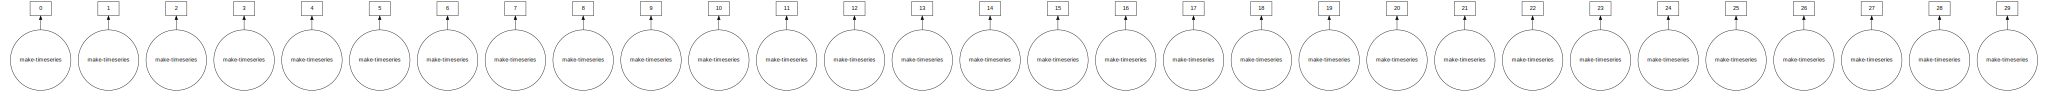

In [15]:
# learning_df.visualize()
learning_df.visualize(filename='what.svg')
# its 30 days, 30 make-timeseries :) 

In [16]:
# help(learning_df)

```

dd.read_csv?

dd.read_csv(
    urlpath,
    blocksize='default',
    lineterminator=None,
    compression='infer',
    sample=256000,
    sample_rows=10,
    enforce=False,
    assume_missing=False,
    storage_options=None,
    include_path_column=False,
    **kwargs,)


This parallelizes the :func:`pandas.read_csv` function in the following ways:

- It supports loading many files at once using globstrings:
    >>> df = dd.read_csv('myfiles.*.csv')  # doctest: +SKIP

- In some cases it can break up large files:
    >>> df = dd.read_csv('largefile.csv', blocksize=25e6)  # 25MB chunks  
    
Internally ``dd.read_csv`` uses :func:`pandas.read_csv` and supports many of the
same keyword arguments with the same performance guarantees. See the docstring
for :func:`pandas.read_csv` for more information on available keyword arguments.

Parameters
----------
urlpath : string or list
    Absolute or relative filepath(s). Prefix with a protocol like ``s3://``
    to read from alternative filesystems. To read from multiple files you
    can pass a globstring or a list of paths, with the caveat that they
    must all have the same protocol.

    blocksize : str, int or None, optional
    Number of bytes by which to cut up larger files. Default value is computed
    based on available physical memory and the number of cores, up to a maximum
    of 64MB. Can be a number like ``64000000` or a string like ``"64MB"``. If
    ``None``, a single block is used for each file.

assume_missing : bool, optional
    If True, all integer columns that aren't specified in ``dtype`` are assumed
    to contain missing values, and are converted to floats. Default is False.

storage_options : dict, optional
    Extra options that make sense for a particular storage connection, e.g.
    host, port, username, password, etc.

include_path_column : bool or str, optional
    Whether or not to include the path to each particular file. If True a new
    column is added to the dataframe called ``path``. If str, sets new column
    name. Default is False.
    
**kwargs
    Extra keyword arguments to forward to :func:`pandas.read_csv`.

Notes
-----
Dask dataframe tries to infer the ``dtype`` of each column by reading a sample
from the start of the file (or of the first file if it's a glob). Usually this
works fine, but if the ``dtype`` is different later in the file (or in other
files) this can cause issues. For example, if all the rows in the sample had
integer dtypes, but later on there was a ``NaN``, then this would error at
compute time. To fix this, you have a few options:

- Provide explicit dtypes for the offending columns using the ``dtype``
  keyword. This is the recommended solution.

- Use the ``assume_missing`` keyword to assume that all columns inferred as
  integers contain missing values, and convert them to floats.

- Increase the size of the sample using the ``sample`` keyword.
                            # thats what i did wrong ! 

It should also be noted that this function may fail if a CSV file
includes quoted strings that contain the line terminator. To get around this
you can specify ``blocksize=None`` to not split files into multiple partitions,
at the cost of reduced parallelism.
```
                            

---

In [17]:
print('Time to get started, \nReading in my huge atmospheric pressure dataset from AoT Program:')

Time to get started, 
Reading in my huge atmospheric pressure dataset from AoT Program:


In [18]:

from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=4, processes=False, memory_limit='2GB')
client


Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://192.168.1.113:8787/status,
Status: running,Using processes: False
Dashboard: http://192.168.1.113:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Comm: inproc://192.168.1.113/4828/1,Workers: 1
Dashboard: http://192.168.1.113:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: inproc://192.168.1.113/4828/3,Total threads: 4
Dashboard: http://192.168.1.113:60064/status,Memory: 1.86 GiB
Nanny: None,


In [82]:

huge_filename = 'data.csv'

df = dd.read_csv(huge_filename)  
                # dtype={'value_raw': 'object'}) 
                # parse_dates = ["data.csv"]) 
                #.set_index('data.csv')
                 

In [83]:
list(df.columns)

['data.csv',
 'node_id',
 'subsystem',
 'sensor',
 'parameter',
 'value_raw',
 'value_hrf']

In [84]:
df.dtypes

data.csv      object
node_id       object
subsystem     object
sensor        object
parameter     object
value_raw      int64
value_hrf    float64
dtype: object

In [75]:

df['data.csv'] = df['data.csv'].astype('M8[us]')


In [76]:
df.dtypes

data.csv     datetime64[ns]
node_id              object
subsystem            object
sensor               object
parameter            object
value_raw            object
value_hrf           float64
dtype: object

In [77]:
df.head(10)

distributed.worker - WARNING - Compute Failed
Function:  safe_head
args:      ((<Serialize: subgraph_callable-eea3f328-d4ac-4be8-a56f-527fa111a4f7>, <Serialize: [(<function read_block_from_file at 0x00000227E455F430>, <OpenFile 'D:/AOT_DATASET_ATMOSPHERIC_PRESSURE/AoT_Chicago.complete.pressure/data.csv'>, 0, 64000000, b'\n'), None, True]>), 10)
kwargs:    {}
Exception: AttributeError("'tuple' object has no attribute 'head'")



AttributeError: 'tuple' object has no attribute 'head'

```python

# allows code to be hidden, unhidden on jupyter notebook

from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide All Notebook Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });</script><form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show All Notebook Code"></form>''')
```


In [87]:
print('Reading in as pandas dataframe:')

Reading in as pandas dataframe:


In [88]:
df = pd.read_csv('data.csv')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.33 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.35 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 1.38 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.02 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.06 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.08 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.77 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.80 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 2.82 GiB -- Worker memory limit: 1.86 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see 

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.